![](1.png)

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [138]:
## Fetching and loading the dataset.
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
data = pd.read_csv(url)

In [139]:
## let's check the shape of our dataset

data.shape

(1000, 40)

### From above code using shape method we can see that our dataset has 1000 rcords(rows) and 40 attributes(columns).

In [140]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [40]:
print("@@"*50)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


## __From the above problem statement we are asking to build a model which can predicts whether an insurance claims is fraudulent or Not. Sicne the outcome of the problem is Not(0) and Yes(1) we can assume that is a classification problem and binary classification since the target variable fraud_reported has only two classes.__ 

In [41]:
print("@@"*50)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


In [141]:
## Null values checking for each attribute

data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### From the above code using isnull() and sum() method we can see clearly only the all attribute has 1000 of null values so let's drop it.

In [142]:
## dropping "_c39" attribute


data.drop('_c39',axis=1,inplace=True)

In [143]:
data.shape

(1000, 39)

### We can see that the column "_c39" is dropped successfully. Great.

In [144]:
for column in data.columns:
    print(data[column].value_counts())
    print('--'*30)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
------------------------------------------------------------
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
------------------------------------------------------------
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
------------------------------------------------------------
01-01-2006    3
28-04-1992    3
05-08-1992    3


### From the about the code using value_counts() method we cannot drop any column yet.

In [145]:
data.duplicated().sum()

0

### From the above code we can see that there is no duplucated value in the dataset.

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### From data.info() we got some import informations about each column like "Dtype", "Non-Null Count" and the columns indexes too and we can see that our dataset columns have only two differents data types " int64 " , "object" and "float64". We can see all the attribute have the same "Non-Null Count" = 1000 and this mean there not missing values as well.

In [46]:
print("@@"*60)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


## Let's convert "policy_bind_date" and "incident_date" into ['year','month','day'].

In [147]:
## policy_bind_date

data['policy_bind_year'] = pd.DatetimeIndex(data['policy_bind_date']).year
data['policy_bind_month'] = pd.DatetimeIndex(data['policy_bind_date']).month
data['policy_bind_day'] = pd.DatetimeIndex(data['policy_bind_date']).day

In [148]:
## incident_date

data['incident_year'] = pd.DatetimeIndex(data['incident_date']).year
data['incident_month'] = pd.DatetimeIndex(data['incident_date']).month
data['incident_day'] = pd.DatetimeIndex(data['incident_date']).day


In [149]:
data.shape

(1000, 45)

### We can see that our dataset have increase the from 39 to 45 attribute. So let drop the "policy_bind_date" and "incident_date" attribute.

In [150]:
## Droping "policy_bind_date" and "incident_date"

data.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

## Let's convert also the attribute "policy_csl" into two seperate attribute.

In [152]:
data['policy_csl']

0       250/500
1       250/500
2       100/300
3       250/500
4      500/1000
         ...   
995    500/1000
996     100/300
997     250/500
998    500/1000
999     250/500
Name: policy_csl, Length: 1000, dtype: object

In [160]:
## creating empty list

My_list = []
policy_csl_x = []
policy_csl_y = []
for x in data['policy_csl']:
    My_list.append(x.split('/'))
for y in My_list:
    policy_csl_x.append(y[0])
for y in My_list:
    policy_csl_y.append(y[1])
    

In [161]:
len(policy_csl_y)

1000

In [162]:
len(policy_csl_x)

1000

In [165]:
## Now let's creat the new attributes with the above data 

data['policy_csl_x'] = policy_csl_x
data['policy_csl_y'] = policy_csl_y

In [166]:
## Now let's drop the "policy_csl"
data.drop("policy_csl",axis=1,inplace=True)


In [171]:
data['policy_csl_x']

0      250
1      250
2      100
3      250
4      500
      ... 
995    500
996    100
997    250
998    500
999    250
Name: policy_csl_x, Length: 1000, dtype: object

In [169]:
data['policy_csl_y']

0       500
1       500
2       300
3       500
4      1000
       ... 
995    1000
996     300
997     500
998    1000
999     500
Name: policy_csl_y, Length: 1000, dtype: object

### As we can see the both attributes "policy_csl_x" and "policy_csl_y" have numerical data but dtype = object so let's convert it into int64.

In [173]:
data["policy_csl_x"] = data["policy_csl_x"].astype(str).astype(int)
data["policy_csl_y"] = data["policy_csl_y"].astype(str).astype(int)


In [174]:
### verification
data['policy_csl_x']

0      250
1      250
2      100
3      250
4      500
      ... 
995    500
996    100
997    250
998    500
999    250
Name: policy_csl_x, Length: 1000, dtype: int64

In [175]:
data['policy_csl_y']

0       500
1       500
2       300
3       500
4      1000
       ... 
995    1000
996     300
997     500
998    1000
999     500
Name: policy_csl_y, Length: 1000, dtype: int64

### As we can see the dtype of the both attributes is dtype: int64

In [179]:
## Let's make the copy to avoid running the above code every time 

data1 = data.copy()

In [183]:
data.shape

(1000, 44)

In [184]:
## verification the shape of our copy data of the  dataset

data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_x,policy_csl_y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,2001.604000,6.559000,15.448000,2015.0,3.407000,13.08400,272.650000,580.200000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,7.360391,3.391758,8.850176,0.0,3.276291,10.44318,161.603196,287.420547
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,1990.000000,1.000000,1.000000,2015.0,1.000000,1.00000,100.000000,300.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,1995.000000,4.000000,8.000000,2015.0,1.000000,2.00000,100.000000,300.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,2002.000000,7.000000,16.000000,2015.0,2.000000,15.00000,250.000000,500.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,2008.000000,9.000000,23.000000,2015.0,5.000000,22.00000,500.000000,1000.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,2015.000000,12.000000,31.000000,2015.0,12.000000,31.00000,500.000000,1000.000000


## We can see that our dataset have 44 attribute now.

### From the describe() method we can see ,how the data is distributed in each column. We can see also the count, the mean,the standard deviation of each column and also the the minimum and the maximum and the quantitles of each column. for the numerical columns.

## __Let's seperate our dataset into two.__ numerical data and text data.

In [185]:
## find the text data

text_data = data.drop(data.describe().columns,axis=1)

In [186]:
## Let's display all the columns

pd.options.display.max_columns = None

In [187]:

text_data.head(3)

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,OH,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N


In [188]:
text_data.shape

(1000, 18)

### We can see that there are total  18 columns which have text data.

In [189]:
## find the text data the numerical data

num_data = data.drop(text_data,axis=1)

In [190]:
num_data.head(3)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_x,policy_csl_y
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,2014,10,17,2015,1,25,250,500
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,2006,6,27,2015,1,21,250,500
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,2000,6,9,2015,2,22,100,300


In [191]:
num_data.shape

(1000, 26)

### We can see that there are total  26 columns which have text data.

In [118]:
print("@@"*60)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


## __First let's clean the numerical data.__

In [192]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   capital-gains                1000 non-null   int64  
 8   capital-loss                 1000 non-null   int64  
 9   incident_hour_of_the_day     1000 non-null   int64  
 10  number_of_vehicles_involved  1000 non-null   int64  
 11  bodily_injuries              1000 non-null   int64  
 12  witnesses                    1000 non-null   int64  
 13  total_claim_amount 

### We can see that the numerical data has only Dtype = 'int64' or "float64"

In [193]:
for column in num_data.columns:
    print(num_data[column].value_counts())
    print('--'*30)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
------------------------------------------------------------
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
------------------------------------------------------------
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64
------------------------------------------------------------
1000    351
500     342
2000    307
Name: policy

### From the above verification we can see that the __"policy_number" has nominal data__. So let's drop it.

In [195]:
## Dropping policy_number attribute

num_data.drop('policy_number',axis=1,inplace=True)

In [196]:
num_data.shape

(1000, 25)

## We can see that our numercial data (num_data) is cleaned.

In [122]:
print("@@"*60)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


## __Secondly let's clean the text data.__

In [194]:
for column in text_data.columns:
    print(text_data[column].value_counts())
    print('--'*30)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------------------------------------
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------------------------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------------------------------------
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
------------------------------------------------------------
reading           64
exercise          57
paintball         57
bungie-jumping    

### From the above code and the output and with my personal analysis think that these attribute __["auto_model","auto_make","incident_location","insured_occupation","insured_hobbies","insured_sex"]__ are not import or not help to predict the claims fraud. So let's drop them.


In [197]:
text_data.drop(["auto_model","auto_make","incident_location","insured_occupation","insured_hobbies","insured_sex"],axis=1,inplace=True)

In [198]:
text_data.shape

(1000, 12)

### Now our text data has only 12 columns.

## Now let's convert the text data into numerical data (Encoding).

### First let's seperate again our text data into two, scable data (Measurable) unscable data (Unmeasurable)

In [199]:
for column in text_data.columns:
    print(text_data[column].value_counts())
    print('--'*30)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------------------------------------
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
------------------------------------------------------------
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
------------------------------------------------------------
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64
------------------------------------------------------

### As we can see the attributes ['collision_type','property_damage','police_report_available'] have __Question Mark(?)__ in some records, So let's solve this problem.

In [200]:
# 'collision_type'

text_data['collision_type'].replace('?',np.nan,inplace=True )

In [201]:
# 'property_damage'

text_data['property_damage'].replace('?',np.nan,inplace=True )

In [202]:
## 'police_report_available'

text_data['police_report_available'].replace('?',np.nan,inplace=True )

In [203]:
## verification

text_data['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [204]:
## verification

text_data['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [205]:
## verification

text_data['police_report_available'].unique()


array(['YES', nan, 'NO'], dtype=object)

### We can see these 3 attribiutes have update values where "?" is replaced by "NaN". So let's used forward fill the fill those "NaN" values.

In [206]:
## For these columns i will fill them using forward fill because there are some kind balance for the value_counts.

text_data['collision_type'] = text_data['collision_type'].fillna(method="ffill")
text_data['property_damage'] = text_data['property_damage'].fillna(method="ffill")
text_data['police_report_available'] = text_data['police_report_available'].fillna(method="ffill")

In [207]:
## verification

text_data['collision_type'].unique()


array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [208]:
## verification

text_data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [209]:
## verification

text_data['police_report_available'].unique()


array(['YES', 'NO'], dtype=object)

In [210]:
for column in text_data.columns:
    print(text_data[column].value_counts())
    print('--'*30)

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------------------------------------------------
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------------------------------------
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
------------------------------------------------------------
Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64
------------------------------------------------------------
Rear Collision     364
Side Collision     332
Front Collision    304
Name: collision_type, dtype: int64
------------------------------------------------------------
Minor Damage    

In [214]:
## unscalable data

unscalable = text_data.drop(['insured_education_level','insured_relationship','authorities_contacted','incident_severity'],axis=1)

In [215]:
unscalable.head(2)

,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,OH,Single Vehicle Collision,Side Collision,SC,Columbus,YES,YES,Y
1,IN,Vehicle Theft,Side Collision,VA,Riverwood,YES,YES,Y


In [216]:
## scalable data

scalable = text_data.drop(unscalable,axis=1)
scalable.head(2)

,insured_education_level,insured_relationship,incident_severity,authorities_contacted
0,MD,husband,Major Damage,Police
1,MD,other-relative,Minor Damage,Police


## __For unscalable we will used LabelEncoder to encoder them.__

### For example "fraud_reported" attribute after LabelEncode we will get { Y =1 and N = 0 }


In [218]:
## importing the libraries

from sklearn.preprocessing import LabelEncoder

In [219]:
unscalable= unscalable.apply(LabelEncoder().fit_transform)

In [220]:
## verication

unscalable.head()

,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,2,2,2,4,1,1,1,1
1,1,3,2,5,5,1,1,1
2,2,0,1,1,1,0,0,0
3,0,2,0,2,0,0,0,1
4,0,3,0,1,0,0,0,0


## __For scalable or measurable data I will use OrdinalEncoder because it measurable data__.


In [222]:
# importing the libraries

from sklearn.preprocessing import OrdinalEncoder


In [223]:
for column in scalable.columns:
    print(scalable[column].value_counts())
    print('--'*30)

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------------------------------------------------
own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64
------------------------------------------------------------
Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64
------------------------------------------------------------
Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64
------------------------------------------------------------


In [224]:
## Here I am ordering the categorical in ascending order in ordinalencoder and encoder all at time.

ord_enc = OrdinalEncoder(categories= [['College','Associate','High School','Masters','PhD','JD','MD'],
                                     ['unmarried','own-child','other-relative','not-in-family','wife','husband'],
                                     ['Trivial Damage','Minor Damage','Major Damage','Total Loss'],
                                     ['None','Other','Police','Ambulance','Fire']])

In [225]:
df_encoded = ord_enc.fit_transform(scalable[scalable.columns])

In [226]:
df_encoded

array([[6., 5., 2., 2.],
       [6., 2., 1., 2.],
       [4., 1., 1., 2.],
       ...,
       [3., 2., 1., 2.],
       [1., 4., 2., 1.],
       [1., 5., 1., 2.]])

### Let's update the scalable data  with the new numerical data after Encodered

In [228]:
scalable['insured_education_level'] = df_encoded[:,0]
scalable['insured_relationship'] = df_encoded[:,1]
scalable['incident_severity'] = df_encoded[:,2]
scalable['authorities_contacted'] = df_encoded[:,3]
    

In [230]:
scalable.head(3)

,insured_education_level,insured_relationship,incident_severity,authorities_contacted
0,6.0,5.0,2.0,2.0
1,6.0,2.0,1.0,2.0
2,4.0,1.0,1.0,2.0


## Now we have our text_data convert into two sub numerical data __(scalable and unscalable )__, So let's concatinate them into a single dataset.

In [231]:
## concatination of the both subdataset

num_data2 = pd.concat([scalable, unscalable],axis=1)

In [232]:
num_data2.head(2)

,insured_education_level,insured_relationship,incident_severity,authorities_contacted,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,6.0,5.0,2.0,2.0,2,2,2,4,1,1,1,1
1,6.0,2.0,1.0,2.0,1,3,2,5,5,1,1,1


In [233]:
num_data2.shape

(1000, 12)

### Great, so let's concatinate again sub dataset __num_data2__ and __num_data.__

In [234]:
## concatination of the both subdataset [num_data, num_data2]

cleaned_data = pd.concat([num_data, num_data2],axis=1)

In [235]:
cleaned_data.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_x,policy_csl_y,insured_education_level,insured_relationship,incident_severity,authorities_contacted,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,2014,10,17,2015,1,25,250,500,6.0,5.0,2.0,2.0,2,2,2,4,1,1,1,1
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,2006,6,27,2015,1,21,250,500,6.0,2.0,1.0,2.0,1,3,2,5,5,1,1,1
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,2000,6,9,2015,2,22,100,300,4.0,1.0,1.0,2.0,2,0,1,1,1,0,0,0
3,256,41,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1990,5,25,2015,10,1,250,500,4.0,0.0,2.0,2.0,0,2,0,2,0,0,0,1
4,228,44,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,2014,6,6,2015,2,17,500,1000,1.0,0.0,1.0,0.0,0,3,0,1,0,0,0,0


In [239]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_zip                  1000 non-null   int64  
 6   capital-gains                1000 non-null   int64  
 7   capital-loss                 1000 non-null   int64  
 8   incident_hour_of_the_day     1000 non-null   int64  
 9   number_of_vehicles_involved  1000 non-null   int64  
 10  bodily_injuries              1000 non-null   int64  
 11  witnesses                    1000 non-null   int64  
 12  total_claim_amount           1000 non-null   int64  
 13  injury_claim       

### From here we can see that our new dataset has only two diffrent dtype: float64 and int64 and this means it has only numerical data. Great.

In [236]:
cleaned_data.shape

(1000, 37)

### __Here we can see that our new dataset  cleaned_data has 1000 records(rows) and 37 attribute(columns).__

In [240]:
print('++'*60)
print('++'*60)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [237]:
## Let's make a copy of our dataset before further process
new_data = cleaned_data.copy()

In [238]:
new_data.shape

(1000, 37)

In [241]:
new_data.head(2)

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_x,policy_csl_y,insured_education_level,insured_relationship,incident_severity,authorities_contacted,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available,fraud_reported
0,328,48,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,2014,10,17,2015,1,25,250,500,6.0,5.0,2.0,2.0,2,2,2,4,1,1,1,1
1,228,42,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,2006,6,27,2015,1,21,250,500,6.0,2.0,1.0,2.0,1,3,2,5,5,1,1,1


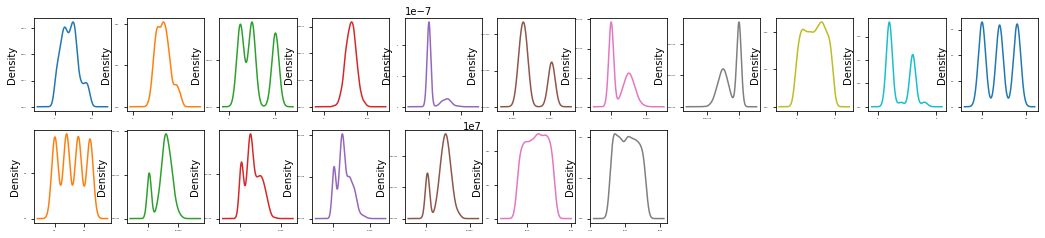

In [243]:
## let's plot the first 18 columns using density plot

new_data.iloc[:,:18].plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

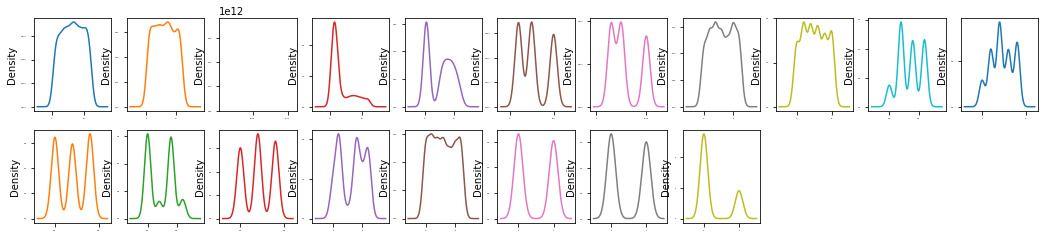

In [244]:
## Let's plot the last columns after 18th column using density plot

new_data.iloc[:,18:].plot(kind='density',subplots=True,
          layout=(6,11),sharex=False,
          legend=False,fontsize='2',
          figsize =(18,12))
plt.show()

## From this density graph we can see that most the columns in the dataset have normal distribution format and some not .

In [248]:
## I am dividing the dataset into two so that I can plot each easily

cols_a = new_data.iloc[:,:18]
cols_b = new_data.iloc[:,18:]


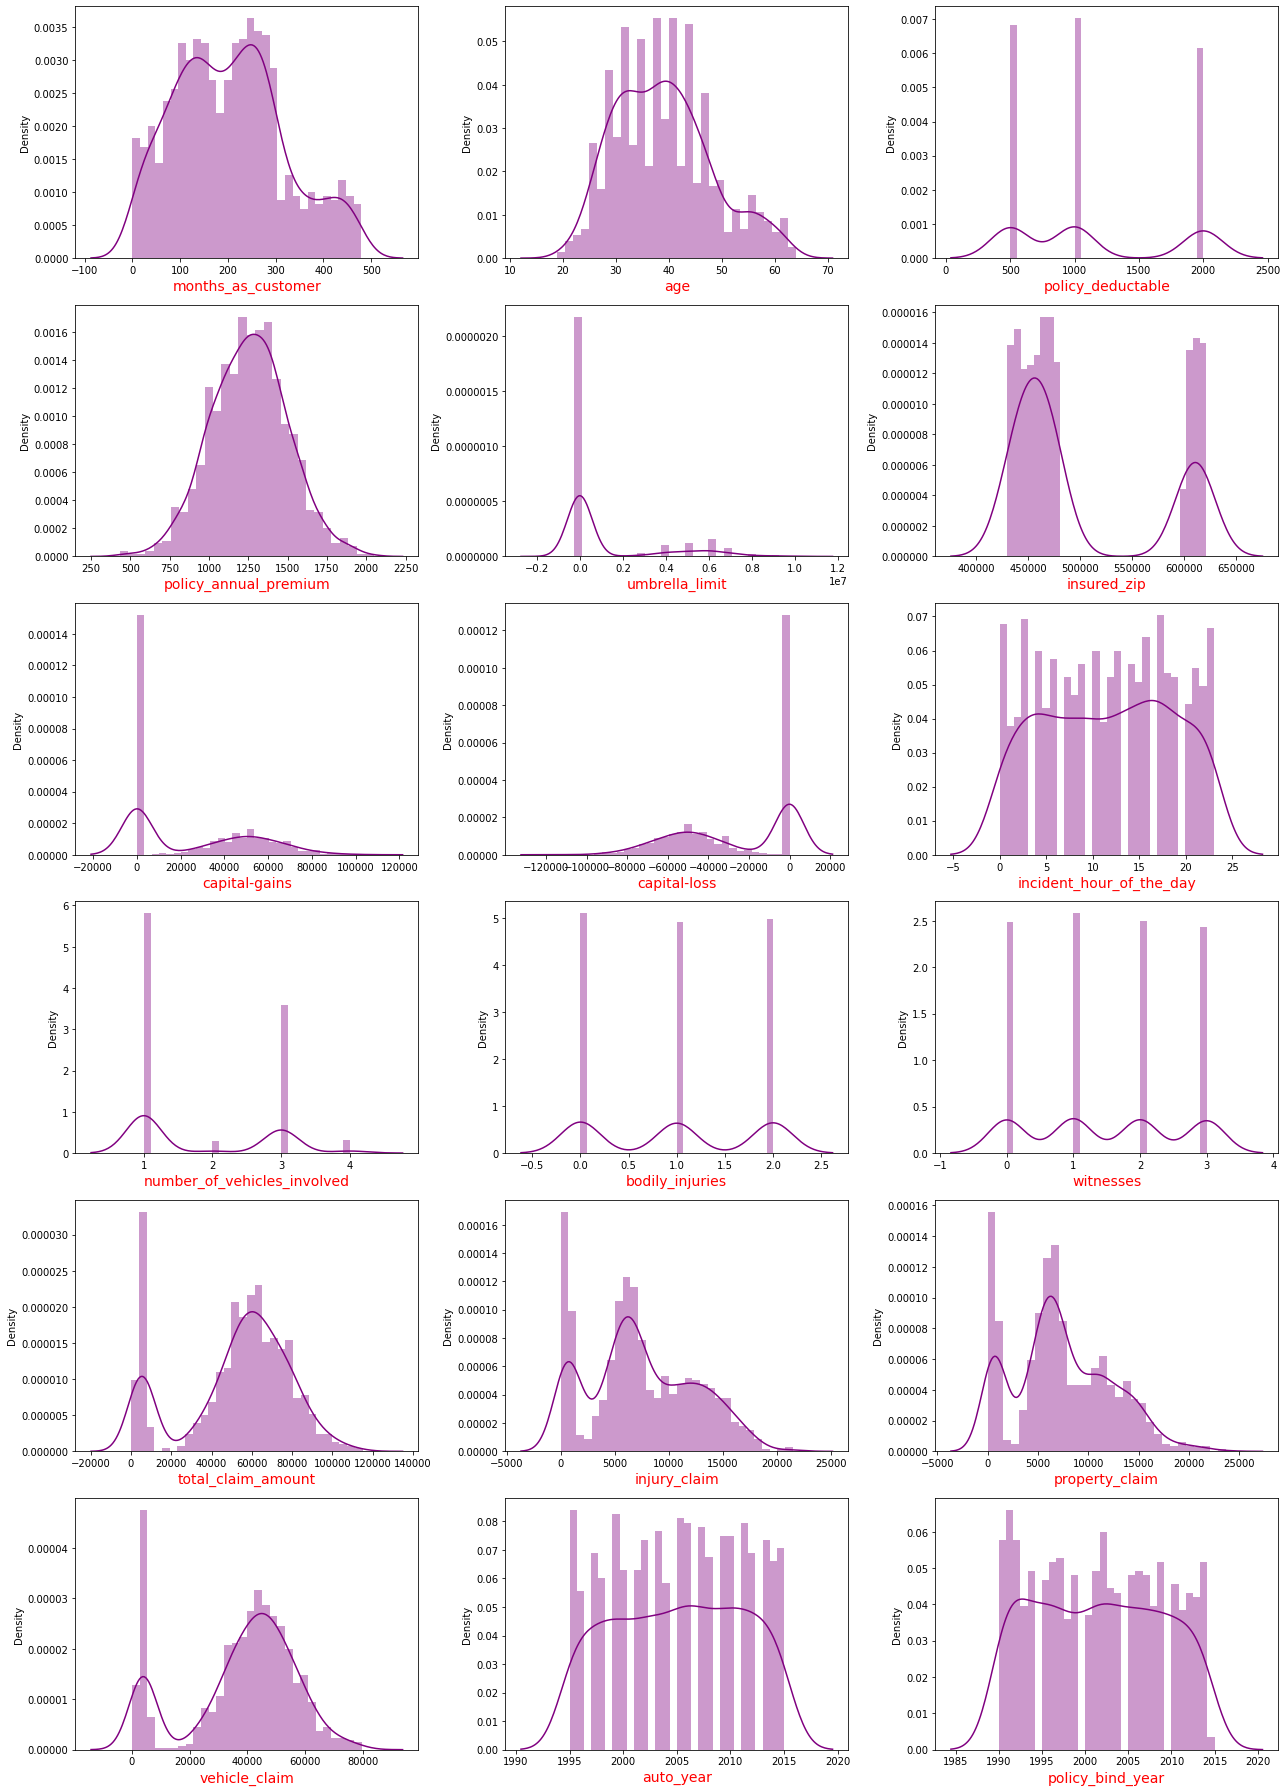

In [250]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in cols_a:
    if plotnumber <= 18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(cols_a[column],bins=30,color='purple')
        plt.xlabel(column,fontsize = 14,color='red')
    plotnumber+=1
plt.tight_layout()

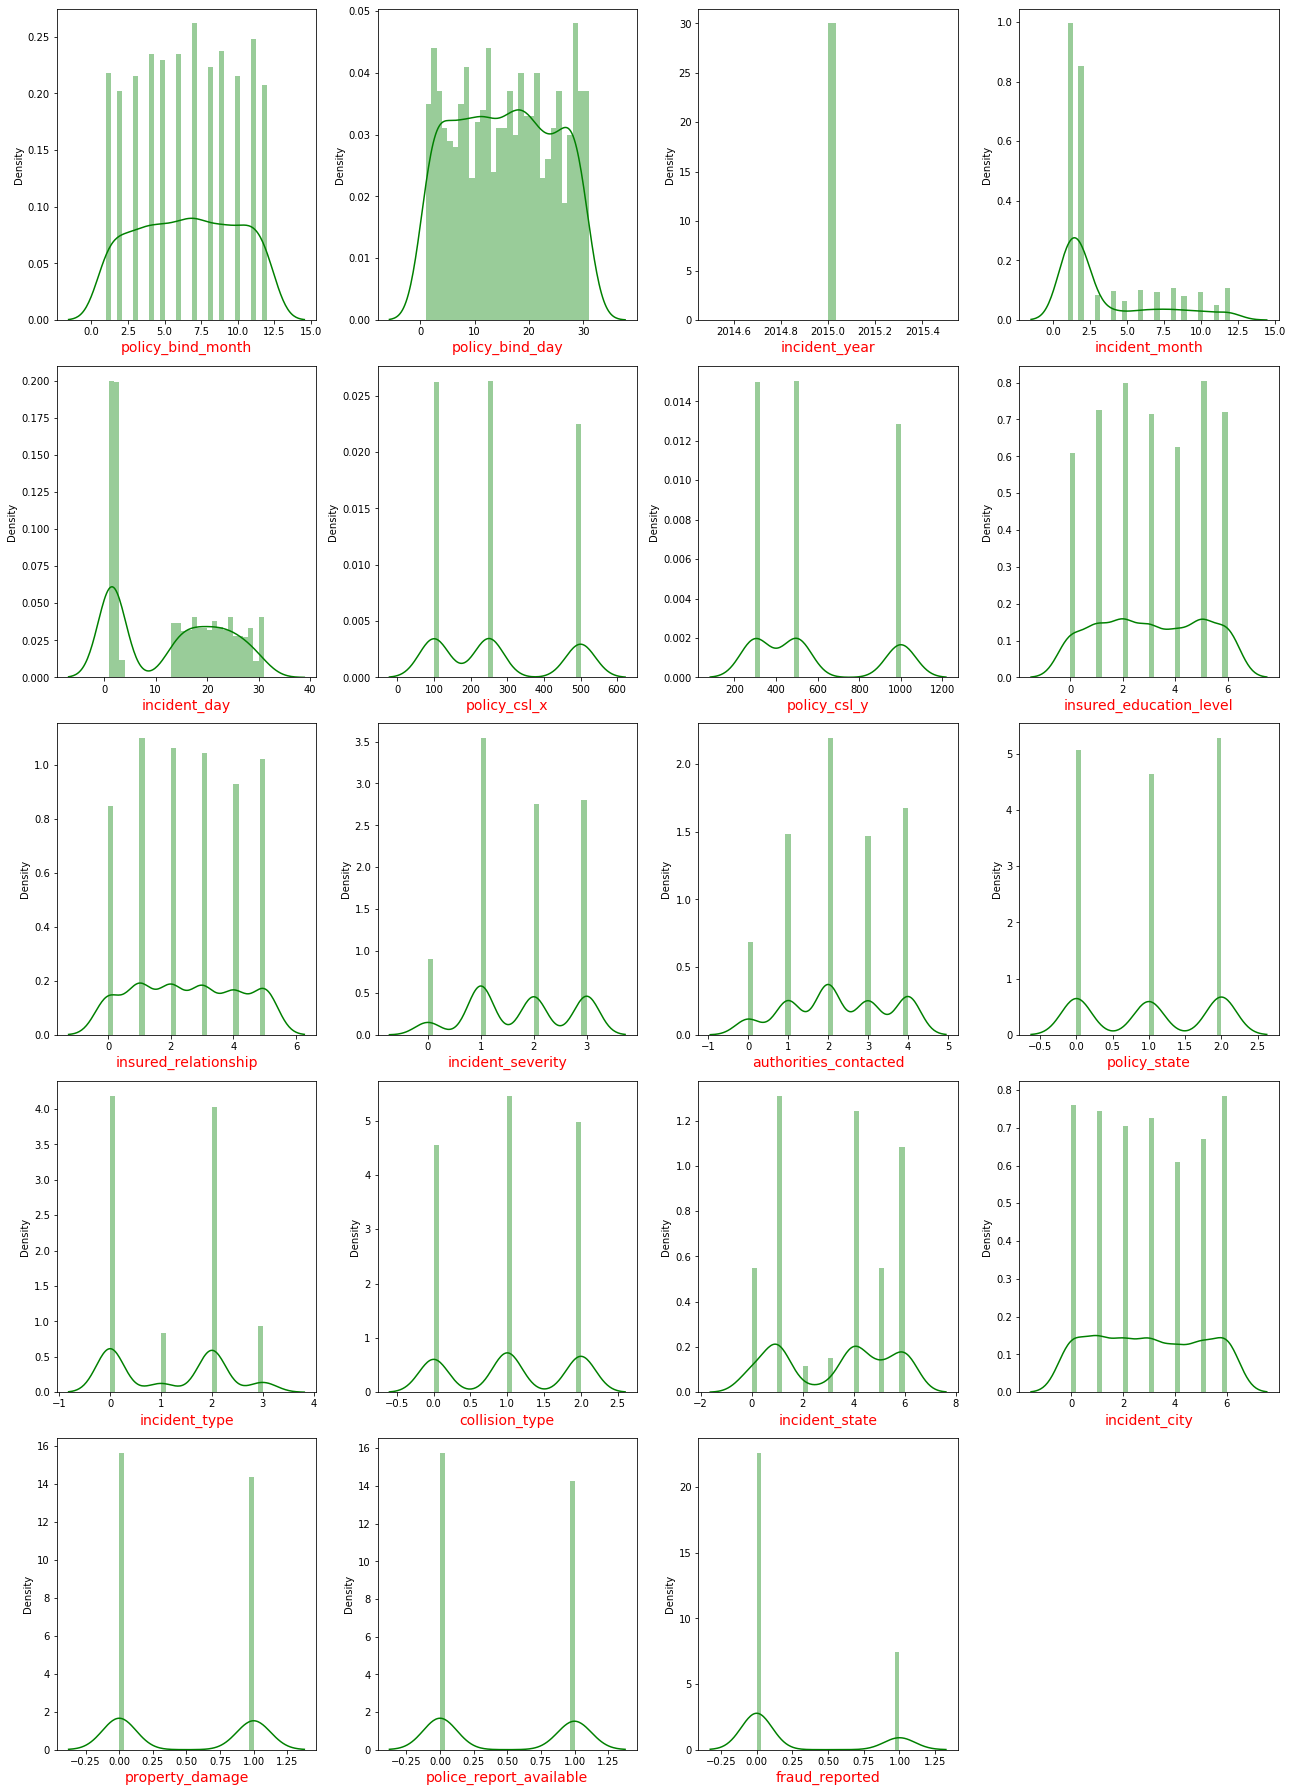

In [252]:
# plot a  distplot check the distribution

plt.figure(figsize=(18,25))
plotnumber = 1

for column in cols_b:
    if plotnumber <= 19:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(cols_b[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 14,color='red')
    plotnumber+=1
plt.tight_layout()

### From distplot we can see that our data is not distributed normally for most the columns since we can see a lot of skewness of the data.

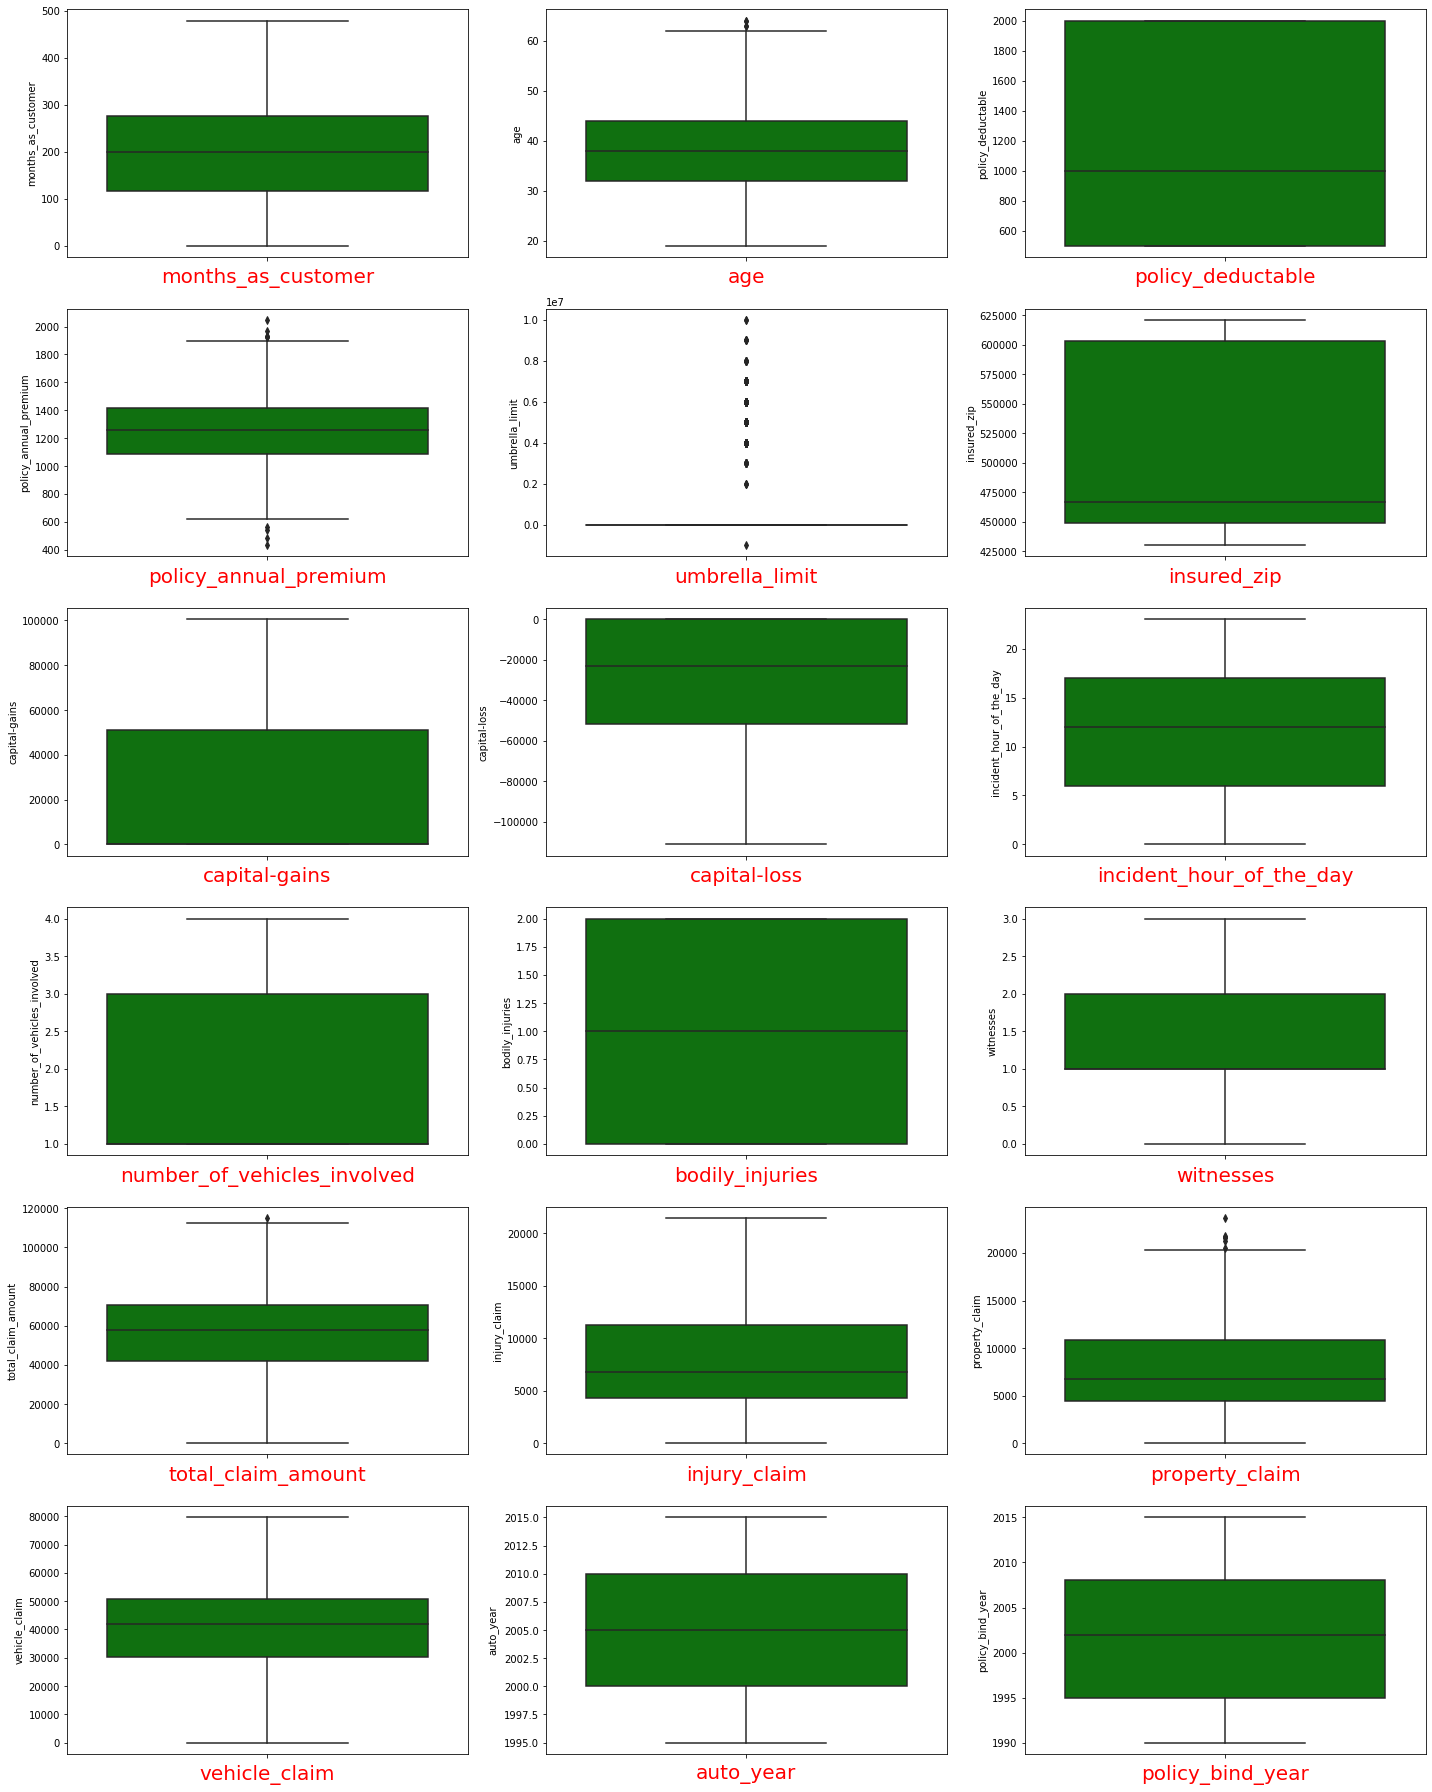

In [253]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in cols_a:
    if plotnumber <= 18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y= cols_a[column],color='green',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

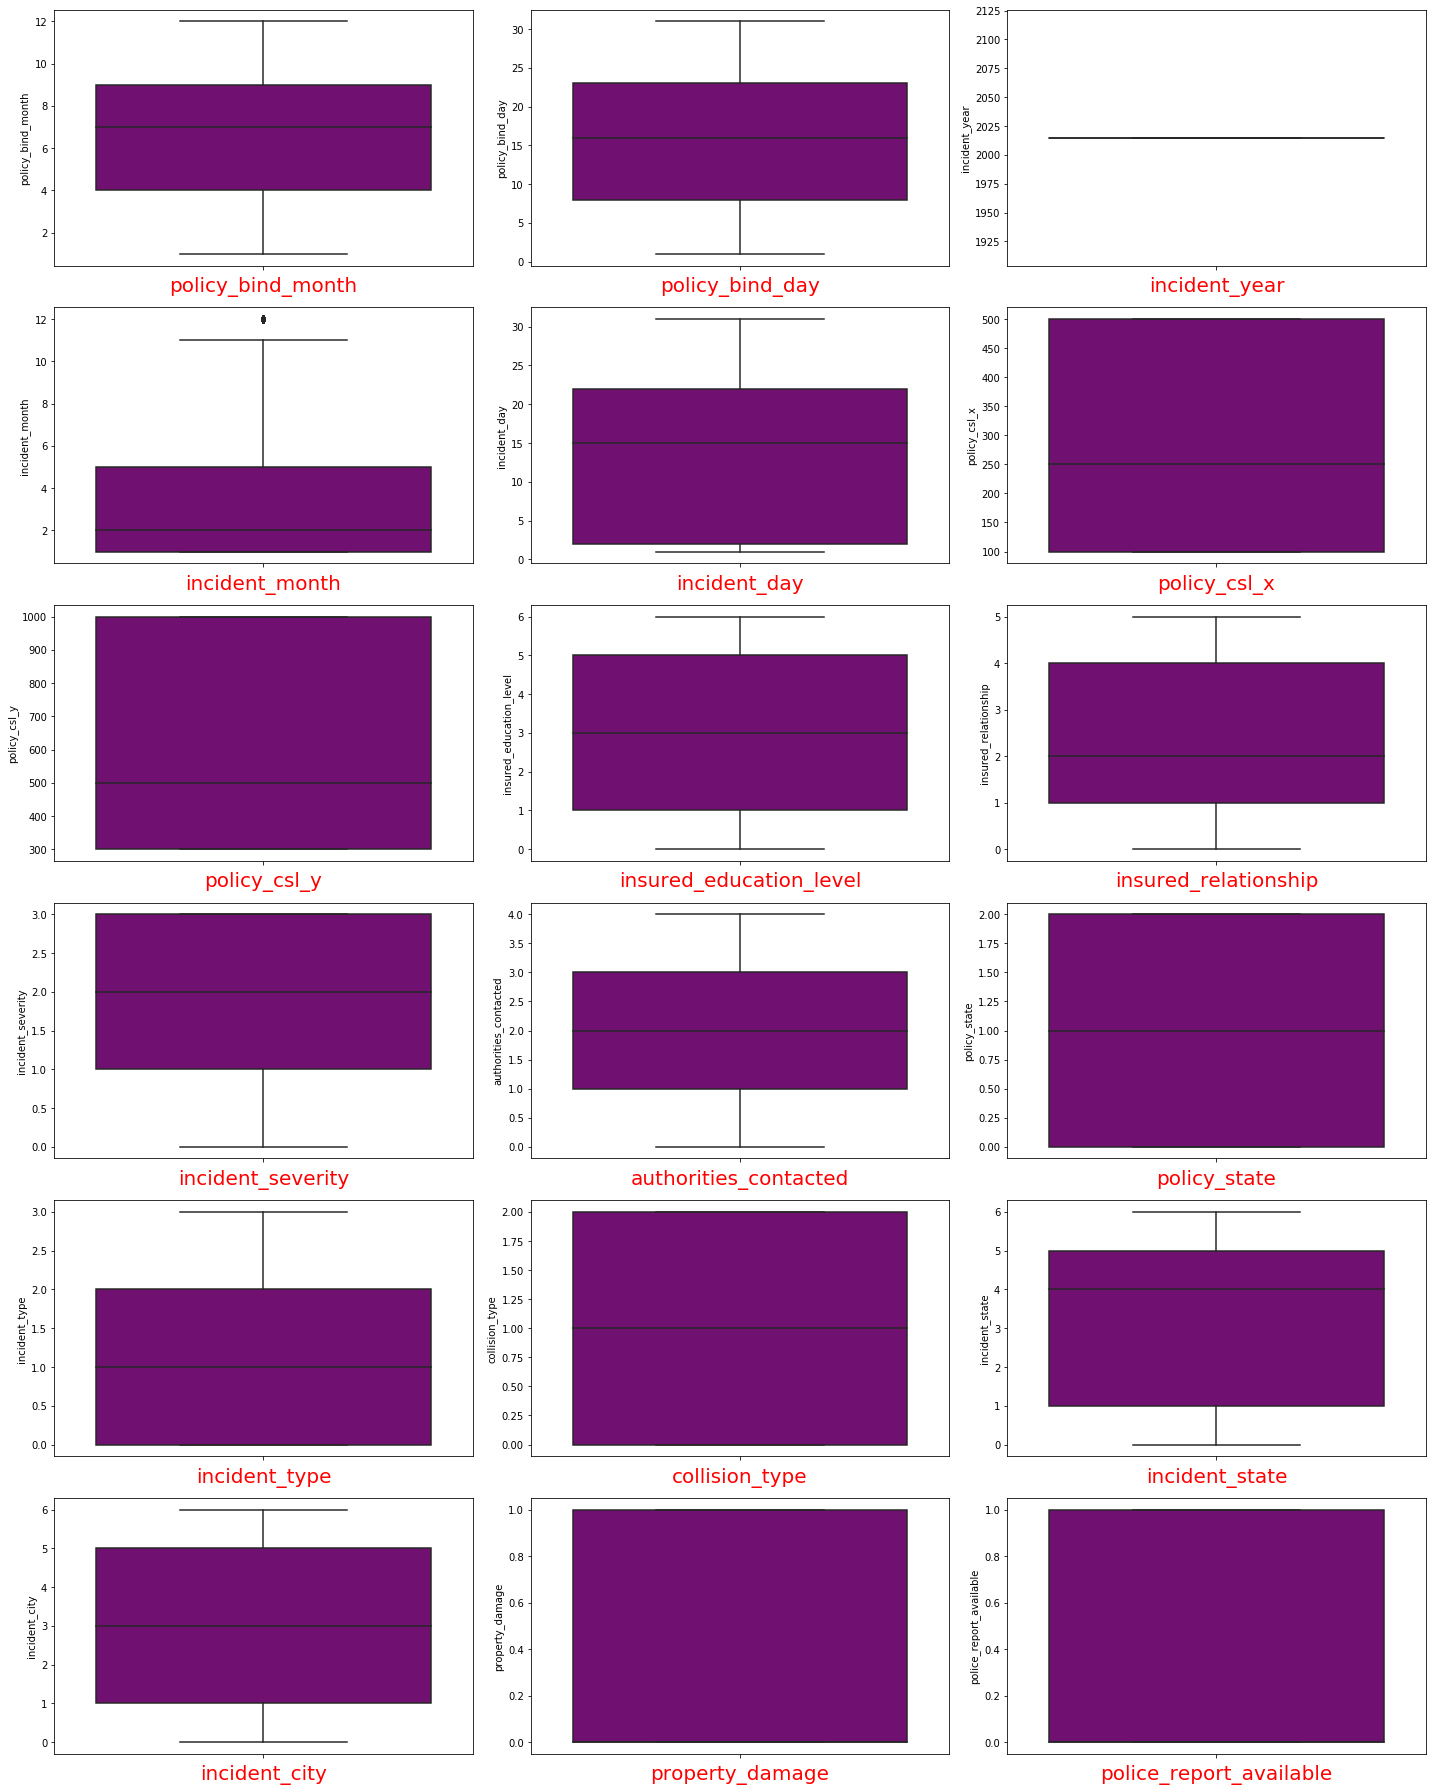

In [255]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in cols_b:
    if plotnumber <= 18:
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y= cols_b[column],color='purple',orient='h')
        plt.xlabel(column,fontsize = 20,color='red')
    plotnumber+=1
plt.tight_layout()

### From the above boxplots graph we can see outliers in few columns. So will see our we can deal the outliers.

In [258]:
new_data.umbrella_limit.value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [259]:
## We can see that most of  data in umbrella_limit attribute  is equal to zero(0), let's drop it.

new_data.drop('umbrella_limit',axis=1,inplace=True)


### Tow more columns plocy_bind_month and plocy_annual_premium but we can ignore them,

## __Let's remove the skewness from the attribute, Skewness removal.__

In [260]:
## importing the libraries
from sklearn.preprocessing import PowerTransformer

In [264]:
## Let's seperate our dataset into feature and and label
features = new_data.drop('fraud_reported',axis=1)

y = new_data.fraud_reported

In [263]:
## instantiate the method

pt=PowerTransformer(method='yeo-johnson')

In [265]:

X_power=pt.fit_transform(features)

In [266]:
## conerting the transformed data into a DataFrame


df=pd.DataFrame(X_power,columns=features.columns)

In [267]:
df

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_year,policy_bind_month,policy_bind_day,incident_year,incident_month,incident_day,policy_csl_x,policy_csl_y,insured_education_level,insured_relationship,incident_severity,authorities_contacted,policy_state,incident_type,collision_type,incident_state,incident_city,property_damage,police_report_available
0,1.051279,1.008733,0.067784,0.616676,0.0,1.033234,1.049532,-0.911676,-0.843679,0.108332,0.517616,0.715714,0.005762,1.081793,0.753697,-0.197455,1.671619,1.003506,0.254254,0.0,-1.100457,1.046044,0.136943,0.048402,1.402798,1.393554,0.277242,-0.194142,1.146048,0.825777,1.185074,0.402170,-0.927320,1.042920,1.051315
1,0.304536,0.431433,1.271863,-0.242577,0.0,-0.982948,1.049532,-0.441383,-0.843679,-1.254857,-1.410682,-1.776979,-1.525347,-1.557391,-1.786629,0.302622,0.602609,-0.109292,1.236653,0.0,-1.100457,0.824760,0.136943,0.048402,1.402798,-0.238409,-0.763119,-0.194142,0.071806,1.440091,1.185074,0.822029,0.981620,1.042920,1.051315
2,-0.511226,-1.139513,1.271863,0.642206,0.0,0.960141,1.049532,-0.593040,1.189521,1.178068,1.290743,-0.716825,0.223833,-0.577507,-0.820881,0.302622,-0.210791,-0.109292,-0.656388,0.0,-0.025412,0.882430,-1.219080,-1.176316,0.518138,-0.881717,-0.763119,-0.194142,1.146048,-1.124824,0.025486,-1.019245,-0.927320,-0.958846,-0.951190
3,0.523344,0.327852,1.271863,0.652860,0.0,1.018186,-1.005137,-0.911676,-0.843679,0.108332,0.517616,0.391426,-0.026762,-0.034793,0.677602,1.497810,-1.589334,-0.407354,1.049715,0.0,1.553521,-1.292836,0.136943,0.048402,0.518138,-1.632591,0.277242,-0.194142,-1.259374,0.825777,-1.324742,-0.508607,-1.591655,-0.958846,-0.951190
4,0.304536,0.631918,0.067784,1.342030,0.0,1.070503,-0.940361,1.151959,-0.843679,-1.254857,-0.355794,-1.729802,-1.304154,-1.622102,-1.740038,0.640027,1.671619,-0.109292,-1.050168,0.0,-0.025412,0.574909,1.257973,1.311817,-1.029855,-1.632591,-0.763119,-1.831927,-1.259374,1.440091,-1.324742,-1.019245,-1.591655,-0.958846,-0.951190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.287530,0.002457,0.067784,0.222833,0.0,-0.982948,1.049532,1.151959,-0.843679,-1.254857,-0.355794,1.338829,1.638435,0.403281,1.259186,0.135129,-1.449974,0.179599,0.148165,0.0,-0.025412,0.882430,1.257973,1.311817,0.040767,-1.632591,-0.763119,1.367511,1.146048,0.825777,-1.324742,-1.600530,0.563629,1.042920,1.051315
996,0.741446,0.327852,0.067784,0.739122,0.0,1.082972,1.049532,1.508938,-0.843679,1.178068,1.290743,2.202447,1.717091,1.767003,1.904757,1.671841,1.671619,-0.407354,-1.856382,0.0,-1.100457,0.992966,-1.219080,-1.176316,0.518138,0.884139,0.277242,1.367511,-1.259374,0.825777,0.025486,0.402170,0.115072,1.042920,1.051315
997,-0.549706,-0.470444,-1.211269,0.520703,0.0,0.960141,1.049532,-1.080756,1.189521,1.178068,1.290743,0.553012,0.188267,0.186095,0.777232,-1.496278,0.197135,-1.380859,0.254254,0.0,-1.100457,0.938462,0.136943,0.048402,0.040767,-0.238409,-0.763119,-0.194142,1.146048,-1.124824,1.185074,-1.600530,-1.591655,1.042920,1.051315
998,1.912654,2.130554,1.271863,0.411823,0.0,-0.982948,1.049532,-1.447906,-0.843679,-1.254857,-0.355794,-0.247520,-0.251353,-0.265012,-0.104258,-1.176246,1.272798,1.266670,0.358635,0.0,-0.025412,1.097786,1.257973,1.311817,-1.029855,0.884139,0.277242,-0.999047,-1.259374,0.825777,0.025486,-1.019245,-1.591655,1.042920,1.051315


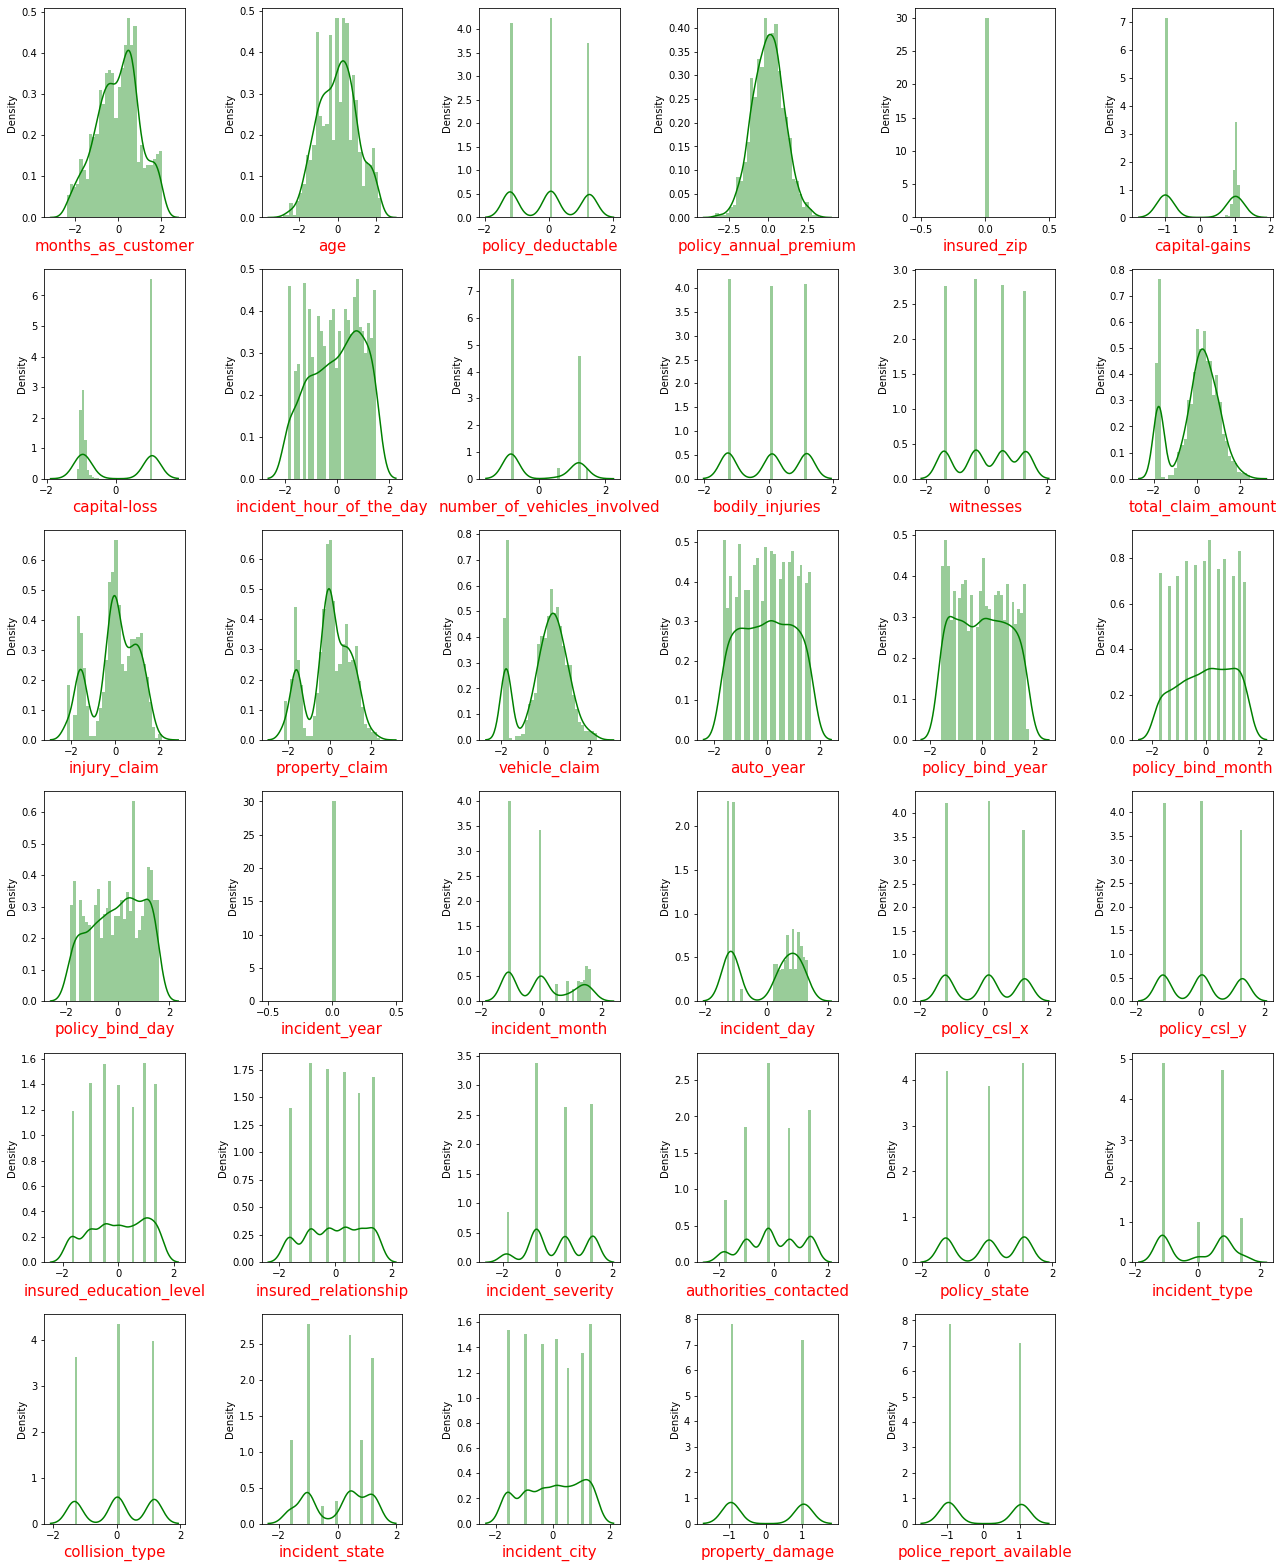

In [268]:
plt.figure(figsize=(18,25))
plotnumber = 1

for column in df:
    if plotnumber <= 35:
        ax = plt.subplot(7,6,plotnumber)
        sns.distplot(df[column],bins=30,color='green')
        plt.xlabel(column,fontsize = 15,color='red')
    plotnumber+=1
plt.tight_layout()

### From here we can see that our data look better than before, and it has less kewness..

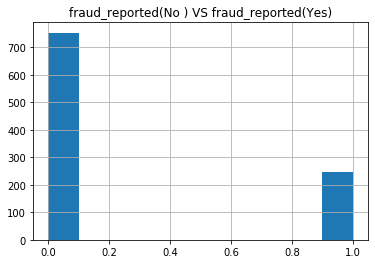

In [271]:
## Checking the classes in the target variable.


y.hist(grid=True)
plt.title('fraud_reported(No ) VS fraud_reported(Yes)')
plt.show()

In [273]:
y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

### From this histogram we can see that the classes are imbalanced and fraud_reported(No ) is majority and fraud_reported(Yes) is the minority. So let's handling class imbalance using oversampling the minority class.

In [274]:
## importang the libraries
from imblearn.over_sampling import SMOTE

SM = SMOTE()

In [275]:
x_over , y_over = SM.fit_resample(df, y)

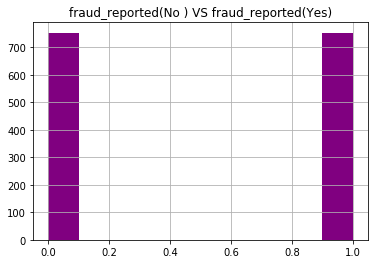

In [277]:
## Verifying again
y_over.hist(grid=True,color='purple')
plt.title('fraud_reported(No ) VS fraud_reported(Yes)')
plt.show()

### Now we can see that our both classes of the label are balanced...


## __Before fit our data to the model ,let's see by visualize the relationship bw the features and the label usig stripplot() method.__

In [279]:
## I am dividing the dataset into two so that I can plot each easily

cols_A = df.iloc[:,:18]
cols_B = df.iloc[:,18:]

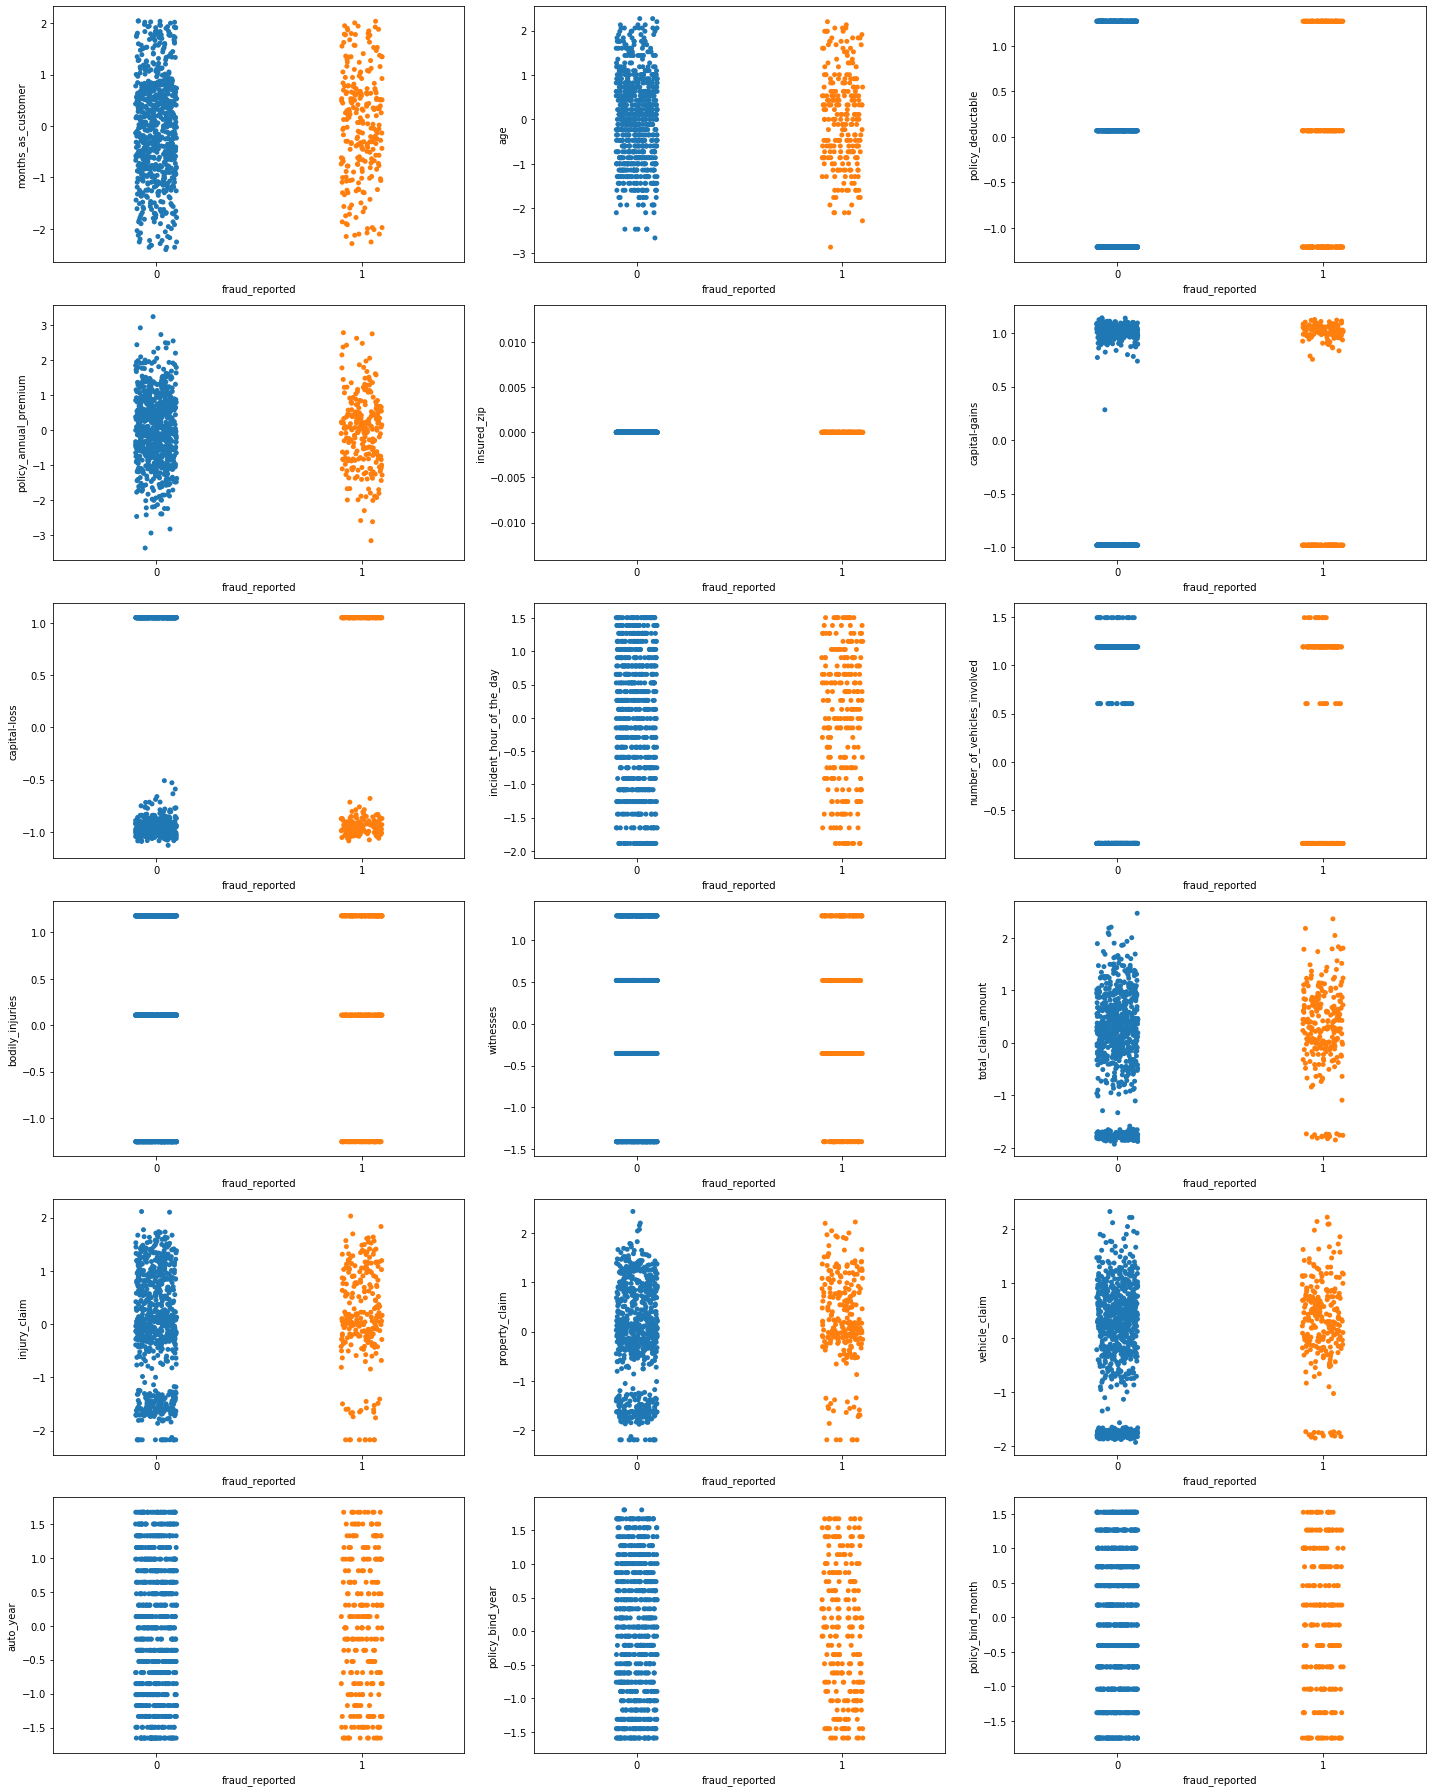

In [280]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for column in cols_A:
    if plot_no <= 18:
        ax = plt.subplot(6,3,plot_no)
        sns.stripplot(y_over, cols_A[column])
    plot_no+=1
plt.tight_layout()

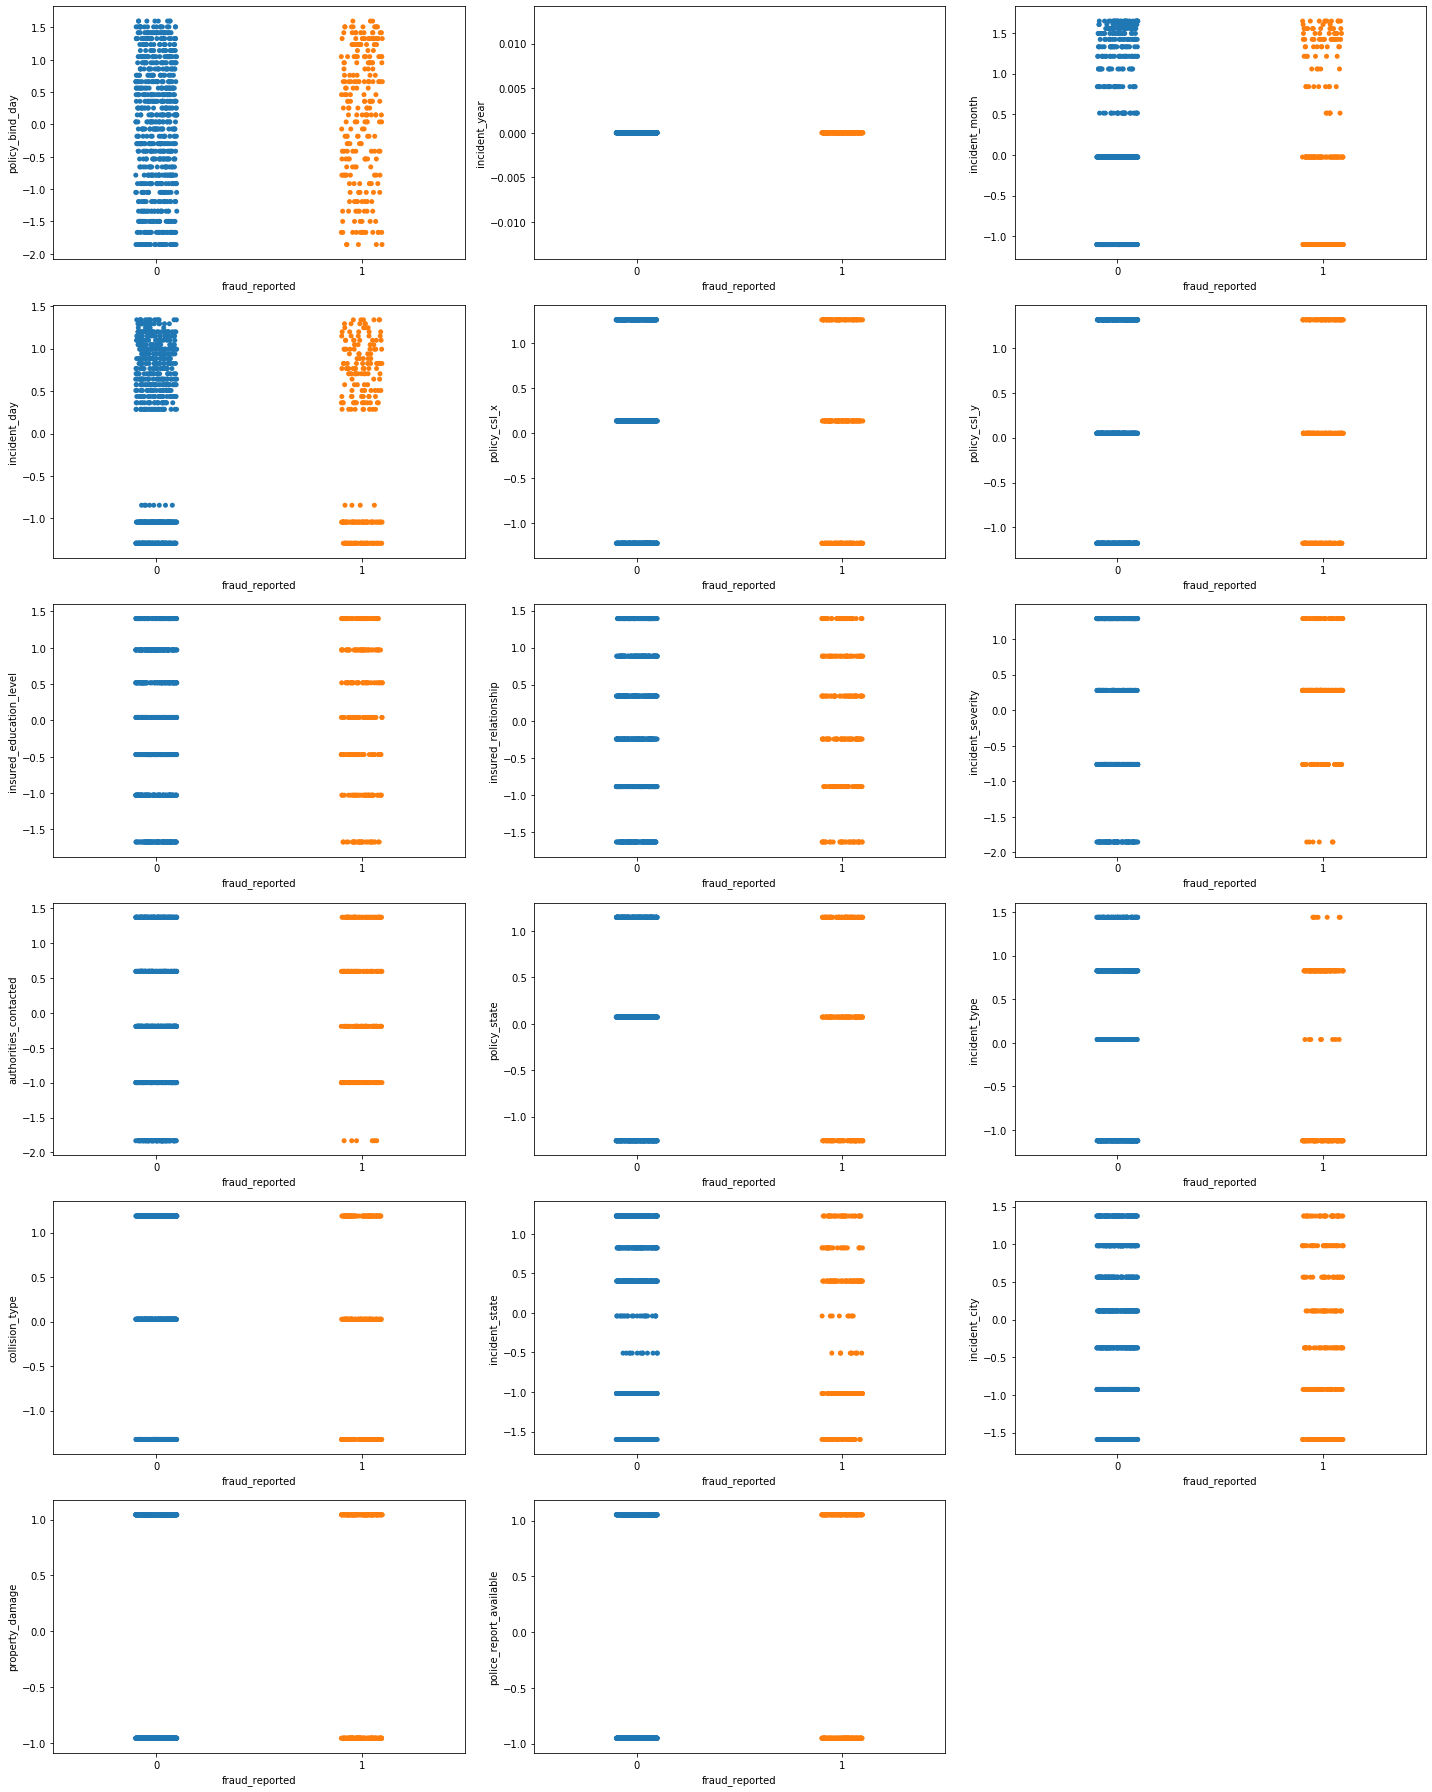

In [282]:
plt.figure(figsize=(20,25), facecolor='white')
plot_no = 1

for column in cols_B:
    if plot_no <= 17:
        ax = plt.subplot(6,3,plot_no)
        sns.stripplot(y_over, cols_B[column])
    plot_no+=1
plt.tight_layout()

### From the above stripplot graphs, we can say that all the features are important and they have relationship with our label data (target column) but some have great relationship with the label but some not.

## __Now let's build the models.__

In [283]:
### Importing the libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [284]:
max_accu = 0
max_RS = 0
for i in range(1,400):
    x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > max_accu:
        max_accu = acc
        max_RS = i
print('Best accuracy is :',max_accu, 'on Random_state',max_RS)

Best accuracy is : 0.8 on Random_state 198


### This code above help us to find the best random_state = 198 and accuracy = 8%.

In [285]:
## let's build gain the model using the ramdom_state=3

x_train, x_test, y_train,y_test = train_test_split(x_over,y_over,
                                                    test_size=30,
                                                    random_state=198)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_predlr = lr_model.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, y_predlr))
print('--'*20)
print(confusion_matrix(y_test,y_predlr))
print(classification_report(y_test,y_predlr))

The Accuracy is : 0.8
----------------------------------------
[[ 9  3]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.83      0.83      0.83        18

    accuracy                           0.80        30
   macro avg       0.79      0.79      0.79        30
weighted avg       0.80      0.80      0.80        30



#### __We built the first model using LogisticRegression Algorithum and the accuracy is : 80%__

## __Let's build a more models select the best one.__

In [286]:
## import the libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # Suport Vector Machine model
from sklearn.ensemble import GradientBoostingClassifier

In [287]:
### DecisionTreeClassifier model.

dt = DecisionTreeClassifier(random_state=198)
dt.fit(x_train, y_train)
pred_dt = dt.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_dt))
print('--'*20)
print(confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))

The Accuracy is : 0.9
----------------------------------------
[[ 9  3]
 [ 0 18]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.86      1.00      0.92        18

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



#### __DecisionTreeClassifier gives Accuracy is : 90%__

In [288]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [292]:
## RandomForestClassifier

rf = RandomForestClassifier(random_state=198)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_rf))
print('--'*20)
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test,pred_rf))

The Accuracy is : 0.9333333333333333
----------------------------------------
[[12  0]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



#### __RandomForestClassifier Accuracy is : 93%__

In [290]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [293]:
# Suport Vector Machine model( SVC )

svc = SVC(random_state=198)

svc.fit(x_train, y_train)

pred_svc = svc.predict(x_test)

print("The Accuracy is :",accuracy_score(y_test, pred_svc))
print('--'*20)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

The Accuracy is : 0.9
----------------------------------------
[[11  1]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.89      0.91        18

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### __Suport Vector Machine model gives Accuracy = 90%__

In [294]:
print('**'*30)
print('**'*30)

************************************************************
************************************************************


In [295]:
### GrandientBoostingClassifier model

gbdt_clf = GradientBoostingClassifier(random_state=198)
gbdt_clf.fit(x_train,y_train)
pred_gb = gbdt_clf.predict(x_test)
print("The Accuracy is :",accuracy_score(y_test, pred_gb))
print('--'*20)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

The Accuracy is : 0.9333333333333333
----------------------------------------
[[12  0]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        18

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30



#### __GrandientBoostingClassifier model gives accuracy = 93%__

## __Let's go for cross validation score and see if there is overfitting or not and wich model performe better among them.__

In [296]:
### importing the library

from sklearn.model_selection import cross_val_score

In [298]:
## first  model lr_model

scr = cross_val_score(lr_model,x_over,y_over,cv=7)
print('Cross Validation Score of LogisticRegression model:',scr.mean())
print('--'*35)

Cross Validation Score of LogisticRegression model: 0.5969053771379353
----------------------------------------------------------------------


In [299]:
## second  model dt

scr = cross_val_score(dt,x_over,y_over,cv=7)
print('Cross Validation Score of DecisionTreeClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of DecisionTreeClassifier model: 0.7856004675772118
----------------------------------------------------------------------


In [300]:
## Third model rf

scr = cross_val_score(rf,x_over,y_over,cv=7)
print('Cross Validation Score of  RandomForestClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of  RandomForestClassifier model: 0.86994893564661
----------------------------------------------------------------------


In [301]:
## Fourth model svc

scr = cross_val_score(svc,x_over,y_over,cv=7)

print('Cross Validation Score of Suport Vector Machine model:',scr.mean())
print('--'*35)

Cross Validation Score of Suport Vector Machine model: 0.839359542266519
----------------------------------------------------------------------


In [302]:
## Fith model GradientBoostingClassifier

scr = cross_val_score(gbdt_clf,x_over,y_over,cv=7)

print('Cross Validation Score of GradientBoostingClassifier model:',scr.mean())
print('--'*35)

Cross Validation Score of GradientBoostingClassifier model: 0.8586717115786884
----------------------------------------------------------------------


In [305]:
print('\nLogisticRegression model diff is:',80 -59)
print('**'*25)

print('\nDecisionTreeClassifier model diff is:',90 -78)
print('**'*25)
print('\nRandomForestClassifier  model diff is:',93 -86)
print('**'*25)
print('\nSuport Vector Machine model diff is:',90 -83)
print('**'*25)
print('\nGradientBoostingClassifier model diff is:',93 -85)


LogisticRegression model diff is: 21
**************************************************

DecisionTreeClassifier model diff is: 12
**************************************************

RandomForestClassifier  model diff is: 7
**************************************************

Suport Vector Machine model diff is: 7
**************************************************

GradientBoostingClassifier model diff is: 8


### __The minimum difference in accuracy and cross validation score is for RandomForestClassifier model and Suport Vector Machine model, So they are our best models__.

In [306]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_roc_curve

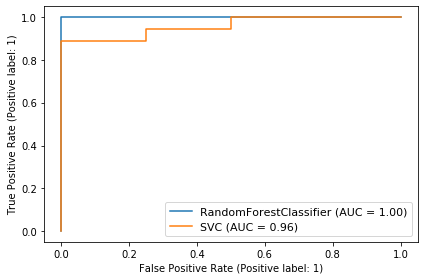

In [307]:
disp = plot_roc_curve(rf,x_test, y_test)

plot_roc_curve(svc,x_test, y_test,ax=disp.ax_) # ax_ =  Axes with confusion matrix

plt.legend(prop ={'size':11},loc='lower right')
plt.tight_layout()

### From the __roc_auc__ Curve we can say that RandomClassifier is our best model, since AUC is able to cover 100 % of the area.

## __We are selected the RandomForestClassifier model with accuracy: 93% as our best model.__

####  __Let's try if we can improve the performance of our model using Hyperparameter Tuning(HPT)__

In [308]:
### importing the libraries

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [309]:
# we are passing the different values for both paramters

grid_param = {
    'criterion':['gini','entropy'],
    'max_features': ['sqrt','log2'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2)
}

In [310]:
grid_search = GridSearchCV(estimator=rf,
                         param_grid=grid_param,
                         cv=7,
                         n_jobs=-1)

In [311]:

## again train the model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=198),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [312]:
# best parameters

best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


### Now we got the best parameters ,let's buld again our model.

In [313]:
## so let's build again the decisionTreeClassifier

rf_model = RandomForestClassifier(criterion='entropy',
                            max_features ='sqrt',
                            max_depth=8,
                            min_samples_leaf=3,
                            min_samples_split=2,
                            random_state=198)

In [314]:
## let's fit gain the model with the data

rf_model.fit(x_train,y_train)
pred_drf = rf_model.predict(x_test)
rf_model_report = pd.DataFrame(classification_report(
    y_test,pred_rf,output_dict=True))


print("\n=============Test Result==============")

print(f"Accuracy Score:{accuracy_score(y_test,pred_drf)*100:.2f}%")
print("_____________________________________________")
print(f"CLASSIFICATION REPORT:\n{rf_model_report}")
print("_____________________________________________")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred_drf)}\n")


=============Test Result==============
Accuracy Score:93.33%
_____________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.857143   1.000000  0.933333   0.928571      0.942857
recall      1.000000   0.888889  0.933333   0.944444      0.933333
f1-score    0.923077   0.941176  0.933333   0.932127      0.933937
support    12.000000  18.000000  0.933333  30.000000     30.000000
_____________________________________________
Confusion Matrix:
[[12  0]
 [ 2 16]]



### __After Hyper paramter Turning we are not able to improve our model accuracy from 93%.  So let's save model as it is.__

# __Conclusion: RandomForestClassifier (rf_model) is our best model with 93% accuracy.__

### __Model saving__

In [317]:
## import the librarie

import joblib

In [318]:
joblib.dump(rf_model,'fraud_Prediction_Model.pkl')

['fraud_Prediction_Model.pkl']

In [319]:
print('@@@'*30)


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@


# __END OF THE PROJECT Thank YOU !!!__